In [5]:
import time
import dask.dataframe as dd
from dask.distributed import Client
import pandas as pd

In [6]:
client = Client()
client.restart()

/Users/yangjinglan/opt/anaconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61610 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:61611 Dashboard: http://127.0.0.1:61610/status,Cluster Workers: 4 Cores: 8 Memory: 16.00 GiB


In [3]:
user_reviews_ddf = dd.read_csv('demo_data.csv')
user_reviews_ddf

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
npartitions=56,,,,,,,,,
,object,object,object,object,object,float64,object,float64,object
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


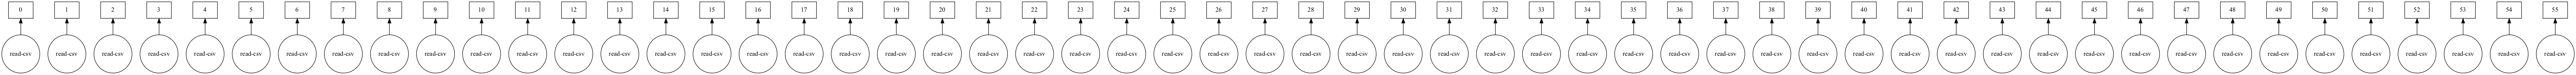

In [4]:
# visualize the task graph

user_reviews_ddf.visualize()

In [7]:
import csv

In [8]:
with open ("assignment1_dataframe.csv",'w') as f:
    csv_write=csv.writer(f)
    csv_head=["reviewID","number_products_rated","avg_ratings","reviewing_since","helpful_votes","total_votes"]
    csv_write.writerow(csv_head)

In [9]:
df=pd.read_csv("assignment1_dataframe.csv")
df.head()

,reviewID,number_products_rated,avg_ratings,reviewing_since,helpful_votes,total_votes


In [12]:
assignment_ddf = dd.read_csv('assignment1_dataframe.csv')
assignment_ddf

,reviewID,number_products_rated,avg_ratings,reviewing_since,helpful_votes,total_votes
npartitions=1,,,,,,
,object,object,object,object,object,object
,...,...,...,...,...,...


In [13]:
ids=user_reviews_ddf.reviewerID

In [14]:
ids.compute()

0        A2T0RJ91B0PQ03
1        A3TYW0XA8HSGWB
2        A2CME0TQU2IVVB
3        A2E5IDLX7R388S
4        A3CIEMYUGV6ZMR
              ...      
40276    A223U0MK3HGFFN
40277    A3DNNW5IIMW82T
40278    A1VYDGO2EDVVWY
40279    A2CRBOZGCZWUXV
40280    A3SR4504YBYC1G
Name: reviewerID, Length: 6158168, dtype: object

In [18]:
assignment_ddf['reviewID']=user_reviews_ddf['reviewerID']

ValueError: Not all divisions are known, can't align partitions. Please use `set_index` to set the index.